In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")  # Creates or opens the database file
cursor = conn.cursor()


In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


In [4]:
sample_data = [
    ('Laptop', 5, 800),
    ('Tablet', 10, 300),
    ('Smartphone', 15, 600),
    ('Laptop', 3, 800),
    ('Smartphone', 7, 600),
    ('Tablet', 2, 300)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [5]:
for row in cursor.execute("SELECT * FROM sales"):
    print(row)


(1, 'Laptop', 5, 800.0)
(2, 'Tablet', 10, 300.0)
(3, 'Smartphone', 15, 600.0)
(4, 'Laptop', 3, 800.0)
(5, 'Smartphone', 7, 600.0)
(6, 'Tablet', 2, 300.0)


In [6]:
import pandas as pd

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)


      product  total_qty  revenue
0      Laptop          8   6400.0
1  Smartphone         22  13200.0
2      Tablet         12   3600.0


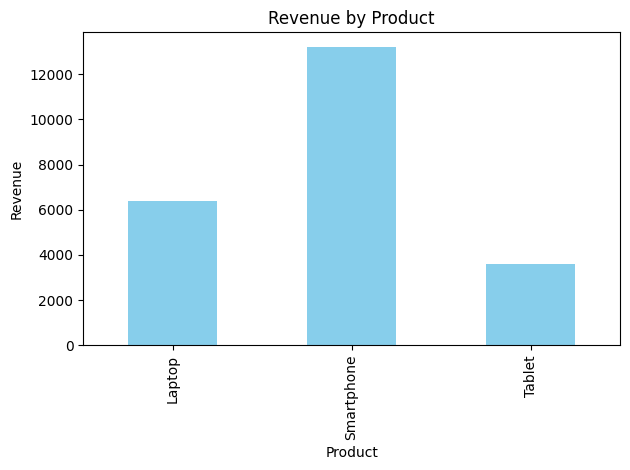

In [7]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

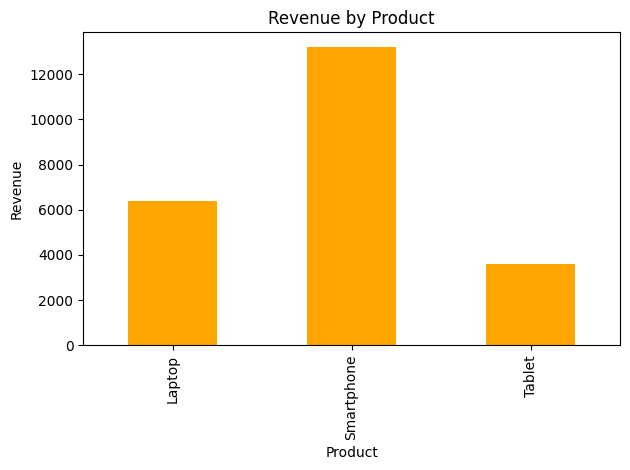

In [8]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")

from google.colab import files
files.download("sales_chart.png")


In [9]:
conn.close()
